In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
### dropping the unnecessary columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
### renaming the columns
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
### converting ham to 0 and spam to 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])

In [9]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
### checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
### checking for duplicate values
df.duplicated().sum()

403

In [12]:
### removing duplicates
df = df.drop_duplicates(keep = 'first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis

In [13]:
### to know the no of spams and hams
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

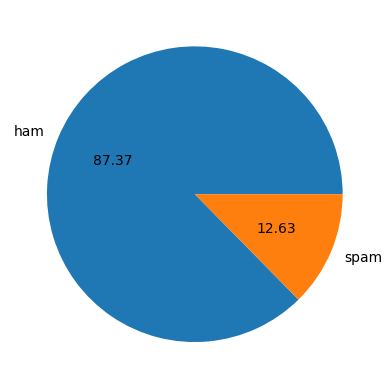

In [14]:
### visualizing in a pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

In [15]:
!pip install nltk

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ARKAPRAVA
[nltk_data]     CHUNARI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters'] = df['text'].apply(len)
df

C:\Users\ARKAPRAVA CHUNARI\AppData\Local\Temp\ipykernel_35144\2658020235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [19]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df

C:\Users\ARKAPRAVA CHUNARI\AppData\Local\Temp\ipykernel_35144\2971413714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [20]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

C:\Users\ARKAPRAVA CHUNARI\AppData\Local\Temp\ipykernel_35144\1043450362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
### for ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
### for spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [24]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

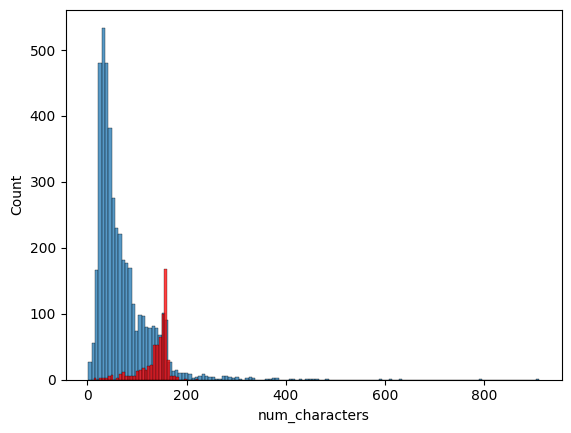

In [25]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

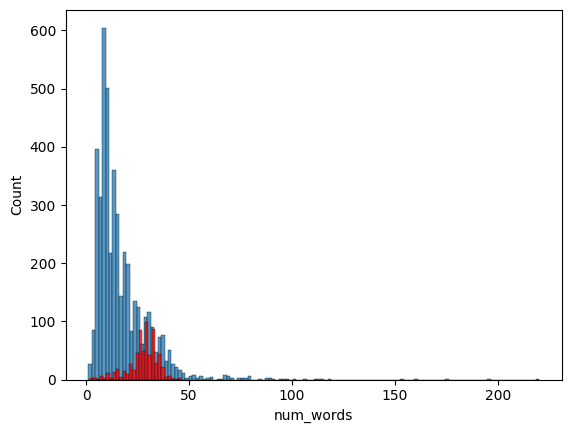

In [26]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

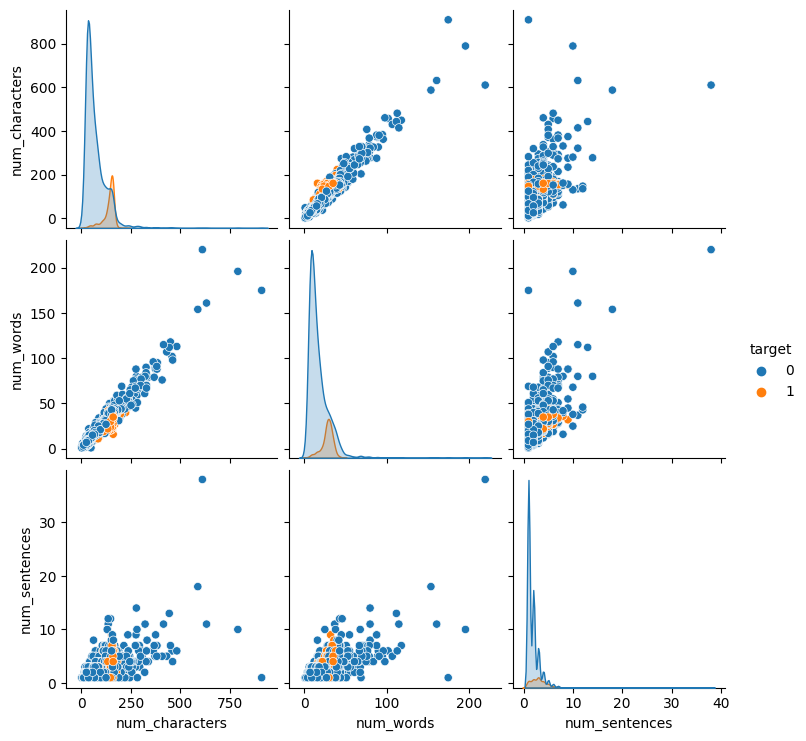

In [27]:
sns.pairplot(df, hue = 'target')

## Text Preprocessing

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ARKAPRAVA
[nltk_data]     CHUNARI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [42]:
import string

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('running')

'run'

In [50]:
def transform_text(text):
    text = text.lower() ## converting to lower cases
    text = nltk.word_tokenize(text) ## tokenizing the words
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i) ## removing special characters only keeping alpha numeric characters
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) ## removing stopwords and punctuations
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i)) ## complete the stemming
        
    return " ".join(y)

In [54]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [55]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [58]:
df['transformed_text'] = df['text'].apply(transform_text)
df

C:\Users\ARKAPRAVA CHUNARI\AppData\Local\Temp\ipykernel_35144\1835954565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [60]:
!pip install wordcloud

                                              0.0/152.1 kB ? eta -:--:--
     --------                                 30.7/152.1 kB ? eta -:--:--
     ------------------------------         122.9/152.1 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 152.1/152.1 kB 1.1 MB/s eta 0:00:00


In [71]:
## wordcloud to enlarge important words in ham and spam messages
from wordcloud import WordCloud
wc = WordCloud(width = 5000, height = 5000, min_font_size = 10, background_color = 'white')

In [72]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))

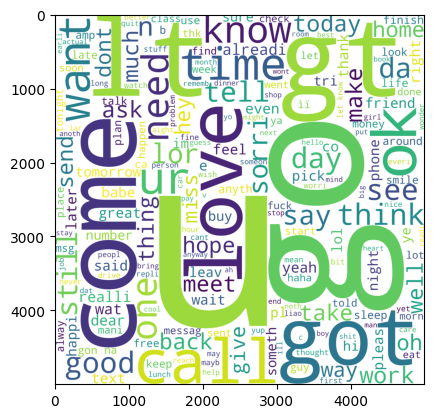

In [73]:
plt.imshow(ham_wc)

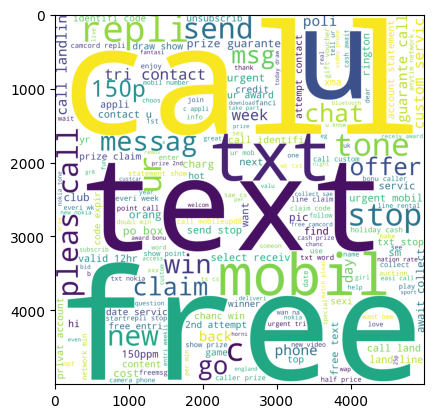

In [74]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))
plt.imshow(spam_wc)

In [79]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [81]:
len(ham_corpus)

35404

In [83]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

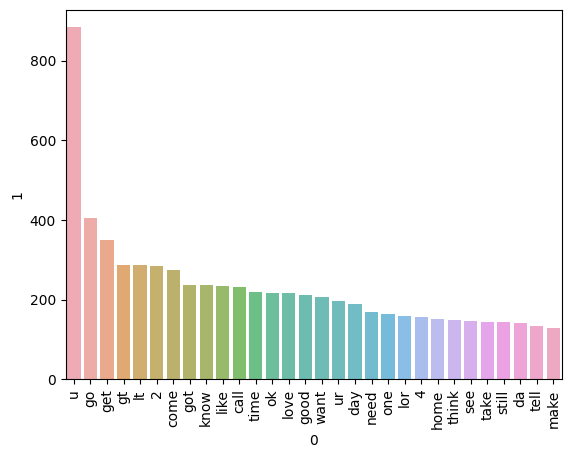

In [87]:
### showing the top 30 messages in ham dataset
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], alpha = 0.8)
plt.xticks(rotation = 'vertical')
plt.show()

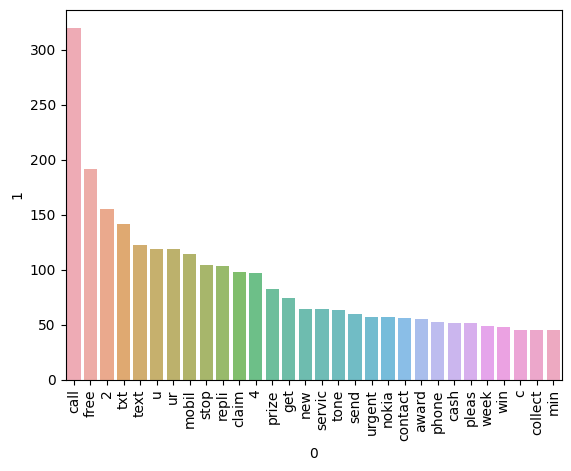

In [90]:
## similarly for spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], alpha = 0.8)
plt.xticks(rotation = 'vertical')
plt.show()

## Model Building

In [91]:
## using bagofwords, tfidf method to vectorize text inputs

In [197]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 2000)

In [198]:
## using toarray() to convert sparse array to dense arrays
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [199]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [201]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [202]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [203]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [204]:
## first trying GaussuianNB
gnb.fit(X_train,y_train)
y_pred_1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))
print(precision_score(y_test, y_pred_1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [205]:
## trying MultinomialNB
mnb.fit(X_train,y_train)
y_pred_2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))
print(precision_score(y_test, y_pred_2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [206]:
## trying BernoulliNB
bnb.fit(X_train,y_train)
y_pred_3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_3))
print(confusion_matrix(y_test, y_pred_3))
print(precision_score(y_test, y_pred_3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [207]:
### BernoulliNB is giving the best accuracy and precision score

In [208]:
### using tfidf
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 2000)

In [209]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [210]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [211]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [212]:
## first trying GaussuianNB
gnb.fit(X_train,y_train)
y_pred_1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))
print(precision_score(y_test, y_pred_1))

0.851063829787234
[[765 131]
 [ 23 115]]
0.46747967479674796


In [213]:
## trying MultinomialNB
mnb.fit(X_train,y_train)
y_pred_2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))
print(precision_score(y_test, y_pred_2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [214]:
## trying BernoulliNB
bnb.fit(X_train,y_train)
y_pred_3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_3))
print(confusion_matrix(y_test, y_pred_3))
print(precision_score(y_test, y_pred_3))

0.9864603481624759
[[895   1]
 [ 13 125]]
0.9920634920634921


In [215]:
### in tfidf MultinomialNB gave the best accuracy of 1.0 means no false positive has occured

In [216]:
### hence choosing mnb with tfidf

In [217]:
### importing new models and comparing them with prev


In [218]:
!pip install xgboost

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [220]:
### creating the objects
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [221]:
### creating a dictionary where keys have algorithm names and values have object names
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [222]:
def train_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [223]:
## logisticregression classifier
train_classifier(lrc, X_train, X_test, y_train, y_test)

(0.9574468085106383, 0.9607843137254902)

In [224]:
## SupportVector classifier
train_classifier(svc, X_train, X_test, y_train, y_test)

(0.9758220502901354, 0.9669421487603306)

In [225]:
## k neighbor classifier
train_classifier(knc, X_train, X_test, y_train, y_test)

(0.9081237911025145, 1.0)

In [226]:
## Multinomial naive bayes
train_classifier(mnb, X_train, X_test, y_train, y_test)

(0.97678916827853, 1.0)

In [227]:
## decision_trees classifier
train_classifier(dtc, X_train, X_test, y_train, y_test)

(0.9342359767891683, 0.8365384615384616)

In [228]:
## random forest classifier
train_classifier(rfc, X_train, X_test, y_train, y_test)

(0.9748549323017408, 0.9666666666666667)

In [229]:
## Adaboost classifier
train_classifier(abc, X_train, X_test, y_train, y_test)

(0.9613152804642167, 0.9537037037037037)

In [230]:
## bagging classifier
train_classifier(bc, X_train, X_test, y_train, y_test)

(0.9564796905222437, 0.849624060150376)

In [231]:
## Extra Trees classifier
train_classifier(etc, X_train, X_test, y_train, y_test)

(0.9777562862669246, 0.9752066115702479)

In [232]:
## gradient boosting classifier
train_classifier(gbdt, X_train, X_test, y_train, y_test)

(0.9526112185686654, 0.9320388349514563)

In [233]:
## xgboost classfier
train_classifier(xgb, X_train, X_test, y_train, y_test)

(0.9690522243713733, 0.9568965517241379)

In [142]:
### based on best precision multinomial naive bayes classifier has given a precision of 1.0 and accuracy of 0.9768

In [235]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model_mnb.pkl','wb'))